In [3]:
import numpy as np
import matplotlib.pyplot
import RG_class as rg
import pandas as pd
from plots_to_analyse_rg_scaling import *
import copy
import time
import warnings
from scipy.stats import binom
warnings.filterwarnings('ignore')
import os

In [35]:
def plot_eigenvalue_spectra_within_clusters(Xs_list, clusters_list, mu_list, n=0, title=""):
    """
    This function plots the eigenvalue spectra within the clusters. At each coarse-grained level the mean and variance of the spectra
    across the different clusters are computed and plotted.

    Parameters:
        Xs - list contianing the dataset at each coarse-grained level
        clusters - list containing the clusters that where formed at the different coarse-grianing iterations
    """
    if n == 0:
        n = len(Xs_list)

    # Loop over coarse-graining iterations
    for j, Xs in enumerate(Xs_list[:n]):
        original_dataset = Xs[0]
        clusters = clusters_list[j]
        
        for i, cluster in enumerate(clusters):

            # Compute cluster size
            try:
                cluster_size = len(cluster[0])
            except TypeError:
                continue

            # Not interested in the spectra of these small clusters
            if cluster_size <= 2:
                continue

            if cluster_size == 16:
                # Compute the spectrum for each cluster, average and plot with std
                eigvalues_l = []
                for c in cluster:

                    if len(c) != cluster_size:
                        continue

                    corr = np.corrcoef(original_dataset[c])
                    eigvalues, _ = np.linalg.eig(corr)
                    eigvalues_l.append(np.sort(eigvalues)[::-1])

                # Compute statistics
                rank = np.arange(1, len(eigvalues) + 1) / len(eigvalues)
                mean = np.mean(eigvalues_l, axis=0)
                std = np.std(eigvalues_l, axis=0)

                # Plot
                plt.errorbar(rank, mean / mean[0], 3*std, fmt="o--", markersize=4, label=f"mu = {mu_list[j]}")

            else:
                continue
        
    plt.xlabel("rank/K")
    plt.ylabel("eigenvalues")
    plt.legend()
    plt.title(title)
    plt.show()

In [36]:
# Directory containing all input files
input_dir = "input/HG19_k6_datasets/"

# Initialize
rg_iterations = 6
Xs_list = []
clusters_list = []
mu_list = []
verbose = False

# Loop over files in input_dir
for f in os.listdir(input_dir):
    
    # Create rg object
    RG = rg.RGObject()
    
    # Load dataset
    RG.load_dataset(f"{input_dir}{f}")
    
    # Show correlation structure in dataset
    if verbose:
        RG.plot_correlation_structure_in_dataset()
    
    # Perform coarse-graining
    t = time.time()
    RG.perform_real_space_coarse_graining("pairwise_clustering_bialek", rg_iterations)
    print(f"RGTs toke {round(time.time() - t, 3)} seconds.")
    
    # Extract data 
    Xs, clusters, _ = RG.extract_data()
    
    # Store data
    Xs_list.append(Xs)
    clusters_list.append(clusters)
    mu = float(f[10:14])
    mu_list.append(mu)

Dataset contains binary values [0, 1].
RGTs toke 0.004 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.001 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.002 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.002 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.002 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.001 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.002 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.002 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.001 seconds.
Dataset contains binary values [0, 1].
RGTs toke 0.001 seconds.


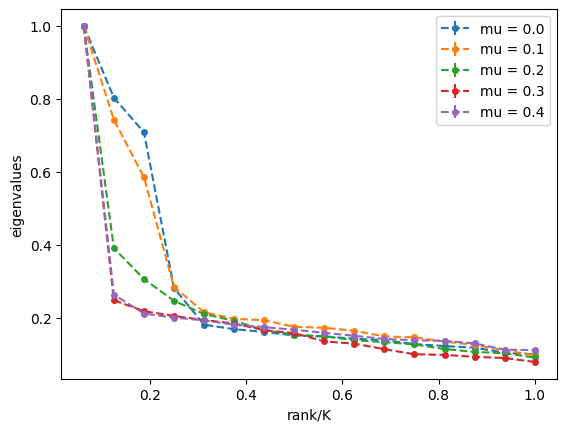

In [38]:
# order list
sort_idx = np.argsort(mu_list)
Xs_list = np.array(Xs_list)[sort_idx]
clusters_list = np.array(clusters_list)[sort_idx]
mu_list = np.array(mu_list)[sort_idx]

plot_eigenvalue_spectra_within_clusters(Xs_list, clusters_list, mu_list, n=5)